<a href="https://colab.research.google.com/github/Jidnya28/Student_performance_Based-on-Decision_Tree/blob/main/Student_performance_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"/content/xAPI-Edu-Data.csv")
data

,gender,StageID,SectionID,Relation,Semester,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,A,Father,F,IT,15,16,2,20,Good,Under-7,M
1,M,lowerlevel,A,Father,F,IT,20,20,3,25,Good,Under-7,M
2,M,lowerlevel,A,Father,F,IT,10,7,0,30,Bad,Above-7,L
3,M,lowerlevel,A,Father,F,IT,30,25,5,35,Bad,Above-7,L
4,M,lowerlevel,A,Father,F,IT,40,50,12,50,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,A,Father,S,Chemistry,5,4,5,8,Bad,Above-7,L
476,F,MiddleSchool,A,Father,F,Geology,50,77,14,28,Bad,Under-7,M
477,F,MiddleSchool,A,Father,S,Geology,55,74,25,29,Bad,Under-7,M
478,F,MiddleSchool,A,Father,F,History,30,17,14,57,Bad,Above-7,L


In [3]:
data.describe(include='all')

,gender,StageID,SectionID,Relation,Semester,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480
unique,2,3,3,2,2,12,NaN,NaN,NaN,NaN,2,2,3
top,M,MiddleSchool,A,Father,F,IT,NaN,NaN,NaN,NaN,Good,Under-7,M
freq,305,248,283,283,245,95,NaN,NaN,NaN,NaN,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   StageID                   480 non-null    object
 2   SectionID                 480 non-null    object
 3   Relation                  480 non-null    object
 4   Semester                  480 non-null    object
 5   Topic                     480 non-null    object
 6   raisedhands               480 non-null    int64 
 7   VisITedResources          480 non-null    int64 
 8   AnnouncementsView         480 non-null    int64 
 9   Discussion                480 non-null    int64 
 10  ParentschoolSatisfaction  480 non-null    object
 11  StudentAbsenceDays        480 non-null    object
 12  Class                     480 non-null    object
dtypes: int64(4), object(9)
memory usage: 48.9+ KB


In [5]:
data.isnull().sum()

,0
gender,0
StageID,0
SectionID,0
Relation,0
Semester,0
Topic,0
raisedhands,0
VisITedResources,0
AnnouncementsView,0
Discussion,0


In [6]:
for i in data.columns:
    print({i:data[i].unique()})

{'gender': array(['M', 'F'], dtype=object)}
{'StageID': array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)}
{'SectionID': array(['A', 'B', 'C'], dtype=object)}
{'Relation': array(['Father', 'Mum'], dtype=object)}
{'Semester': array(['F', 'S'], dtype=object)}
{'Topic': array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)}
{'raisedhands': array([ 15,  20,  10,  30,  40,  42,  35,  50,  12,  70,  19,   5,  62,
        36,  55,  69,  60,   2,   0,   8,  25,  75,   4,  45,  14,  33,
         7,  13,  29,  39,  49,  16,  28,  27,  21,  80,  17,  65,  22,
        11,   1,   3, 100,   6,  90,  77,  24,  66,  23,  82,  72,  51,
        85,  87,  95,  81,  53,  92,  83,  67,  96,  57,  73,   9,  32,
        52,  59,  61,  79,  18,  74,  97,  41,  71,  98,  78,  89,  88,
        86,  76,  99,  84])}
{'VisITedResources': array([16, 20,  7, 25, 50, 30, 12, 10, 21, 80, 88,  6,  1, 1

In [7]:
data.Topic.value_counts()

,count
Topic,
IT,95
French,65
Arabic,59
Science,51
English,45
Biology,30
Spanish,25
Geology,24
Chemistry,24


In [8]:
data['Institute']='XYZ'
data

,gender,StageID,SectionID,Relation,Semester,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class,Institute
0,M,lowerlevel,A,Father,F,IT,15,16,2,20,Good,Under-7,M,XYZ
1,M,lowerlevel,A,Father,F,IT,20,20,3,25,Good,Under-7,M,XYZ
2,M,lowerlevel,A,Father,F,IT,10,7,0,30,Bad,Above-7,L,XYZ
3,M,lowerlevel,A,Father,F,IT,30,25,5,35,Bad,Above-7,L,XYZ
4,M,lowerlevel,A,Father,F,IT,40,50,12,50,Bad,Above-7,M,XYZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,A,Father,S,Chemistry,5,4,5,8,Bad,Above-7,L,XYZ
476,F,MiddleSchool,A,Father,F,Geology,50,77,14,28,Bad,Under-7,M,XYZ
477,F,MiddleSchool,A,Father,S,Geology,55,74,25,29,Bad,Under-7,M,XYZ
478,F,MiddleSchool,A,Father,F,History,30,17,14,57,Bad,Above-7,L,XYZ


# Feature Selection:

In [9]:
# Feature selection based on singularity and cardinality
data.columns

Index(['gender', 'StageID', 'SectionID', 'Relation', 'Semester', 'Topic',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class', 'Institute'],
      dtype='object')

In [10]:
data

,gender,StageID,SectionID,Relation,Semester,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class,Institute
0,M,lowerlevel,A,Father,F,IT,15,16,2,20,Good,Under-7,M,XYZ
1,M,lowerlevel,A,Father,F,IT,20,20,3,25,Good,Under-7,M,XYZ
2,M,lowerlevel,A,Father,F,IT,10,7,0,30,Bad,Above-7,L,XYZ
3,M,lowerlevel,A,Father,F,IT,30,25,5,35,Bad,Above-7,L,XYZ
4,M,lowerlevel,A,Father,F,IT,40,50,12,50,Bad,Above-7,M,XYZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,A,Father,S,Chemistry,5,4,5,8,Bad,Above-7,L,XYZ
476,F,MiddleSchool,A,Father,F,Geology,50,77,14,28,Bad,Under-7,M,XYZ
477,F,MiddleSchool,A,Father,S,Geology,55,74,25,29,Bad,Under-7,M,XYZ
478,F,MiddleSchool,A,Father,F,History,30,17,14,57,Bad,Above-7,L,XYZ


In [11]:
### Dropping institute columns as it has singularity
data.drop(['Institute'],axis=1,inplace=True)           # axis=1 is relate column, axis=0 is relate row

In [12]:
data

,gender,StageID,SectionID,Relation,Semester,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,A,Father,F,IT,15,16,2,20,Good,Under-7,M
1,M,lowerlevel,A,Father,F,IT,20,20,3,25,Good,Under-7,M
2,M,lowerlevel,A,Father,F,IT,10,7,0,30,Bad,Above-7,L
3,M,lowerlevel,A,Father,F,IT,30,25,5,35,Bad,Above-7,L
4,M,lowerlevel,A,Father,F,IT,40,50,12,50,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,A,Father,S,Chemistry,5,4,5,8,Bad,Above-7,L
476,F,MiddleSchool,A,Father,F,Geology,50,77,14,28,Bad,Under-7,M
477,F,MiddleSchool,A,Father,S,Geology,55,74,25,29,Bad,Under-7,M
478,F,MiddleSchool,A,Father,F,History,30,17,14,57,Bad,Above-7,L


In [13]:
# Dropping 'SectionID','Semester' based on domain knowledge
data.drop(['SectionID','Semester'],axis=1,inplace=True)

In [14]:
data

,gender,StageID,Relation,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,Father,IT,15,16,2,20,Good,Under-7,M
1,M,lowerlevel,Father,IT,20,20,3,25,Good,Under-7,M
2,M,lowerlevel,Father,IT,10,7,0,30,Bad,Above-7,L
3,M,lowerlevel,Father,IT,30,25,5,35,Bad,Above-7,L
4,M,lowerlevel,Father,IT,40,50,12,50,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,Father,Chemistry,5,4,5,8,Bad,Above-7,L
476,F,MiddleSchool,Father,Geology,50,77,14,28,Bad,Under-7,M
477,F,MiddleSchool,Father,Geology,55,74,25,29,Bad,Under-7,M
478,F,MiddleSchool,Father,History,30,17,14,57,Bad,Above-7,L


In [15]:
# Dropping feature 'Topic' on the basis of domain knowledge & high cardinality
data.drop('Topic',axis=1,inplace=True)

In [16]:
data

,gender,StageID,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,Father,15,16,2,20,Good,Under-7,M
1,M,lowerlevel,Father,20,20,3,25,Good,Under-7,M
2,M,lowerlevel,Father,10,7,0,30,Bad,Above-7,L
3,M,lowerlevel,Father,30,25,5,35,Bad,Above-7,L
4,M,lowerlevel,Father,40,50,12,50,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,Father,5,4,5,8,Bad,Above-7,L
476,F,MiddleSchool,Father,50,77,14,28,Bad,Under-7,M
477,F,MiddleSchool,Father,55,74,25,29,Bad,Under-7,M
478,F,MiddleSchool,Father,30,17,14,57,Bad,Above-7,L


# EDA

In [17]:
data.dtypes

,0
gender,object
StageID,object
Relation,object
raisedhands,int64
VisITedResources,int64
AnnouncementsView,int64
Discussion,int64
ParentschoolSatisfaction,object
StudentAbsenceDays,object
Class,object


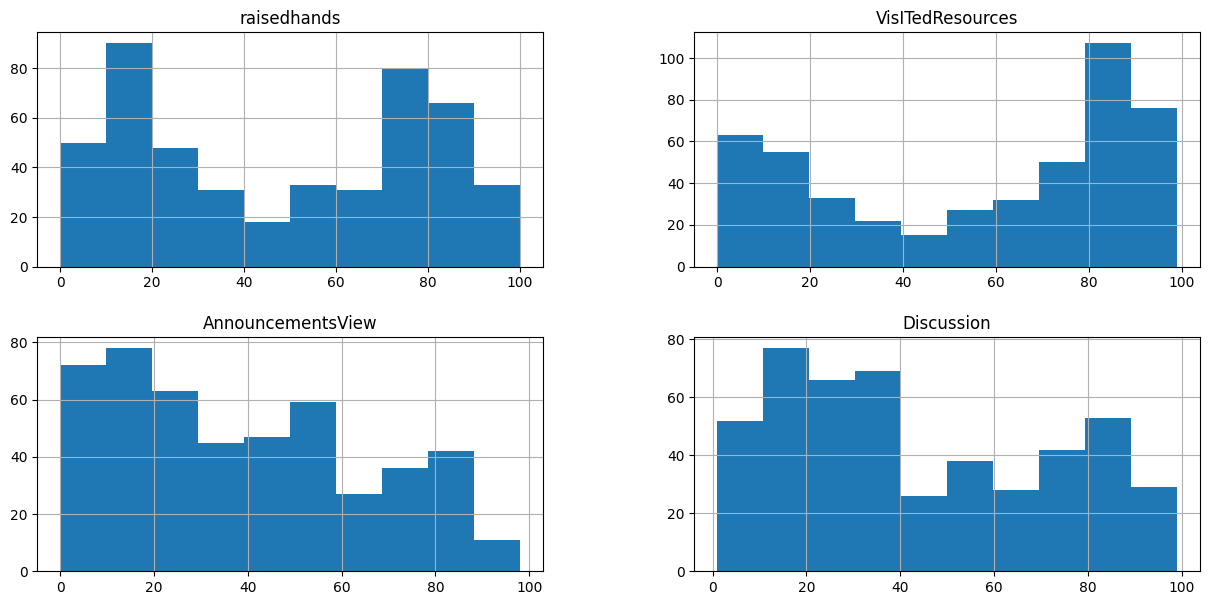

In [18]:
# Histogram helps to understand the frequency distribution of single continous numeric feature
data.hist(figsize=(15,7));     # 15,7 is graph size

In [19]:
# In the above histogram x-axis defines the frequency number of a student activity on a perticular attribute
 # and y-axis  defines the counts.
#majority students perform visiting resource
#majority of the students are less eager to view announcement & to discussion groups
# an average situation arise in case of the hand raising

In [20]:
data.columns

Index(['gender', 'StageID', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [21]:
feature=['raisedhands','VisITedResources','AnnouncementsView','Discussion']

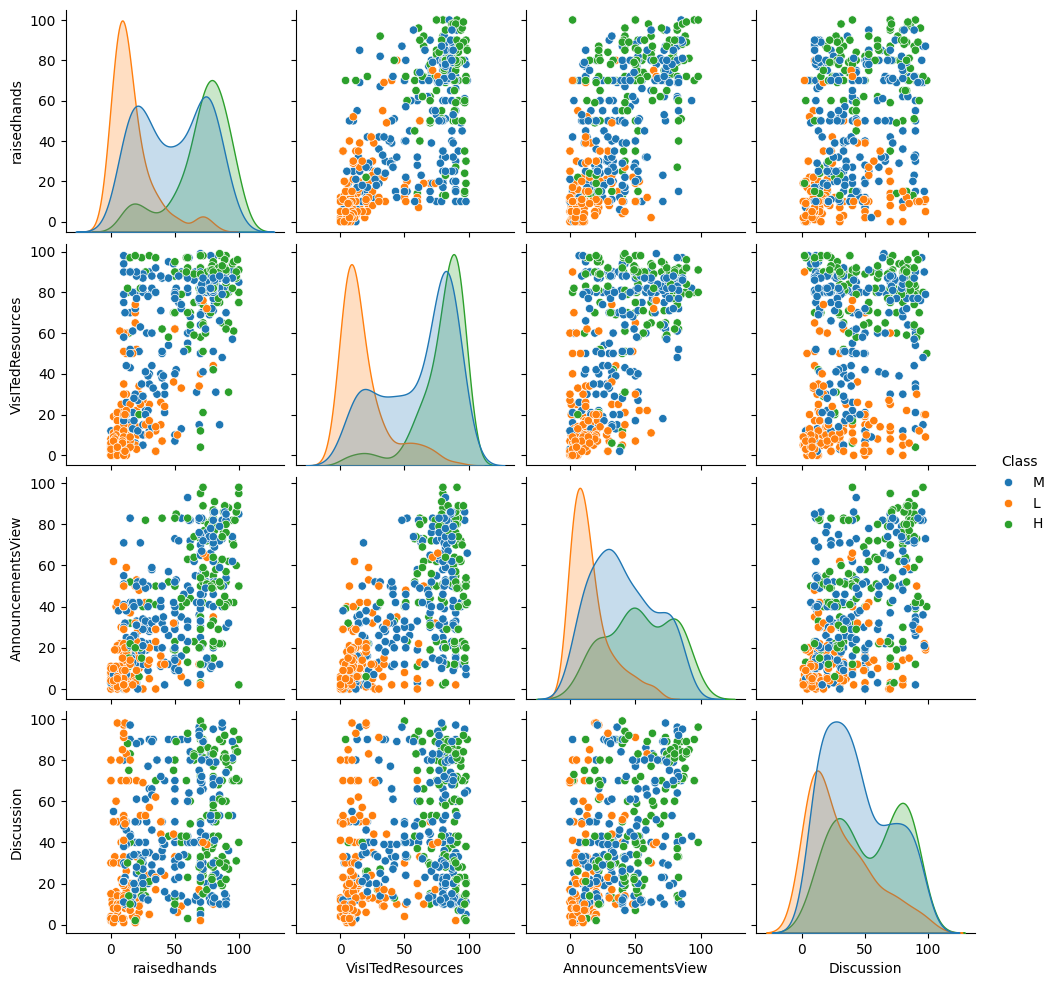

In [22]:
sns.pairplot(x_vars=feature,y_vars=feature,data=data,hue='Class')

''' from the above pair plot it is quit a lot clear to see high and low-level students are distinguishable in every combination of pair plot but medium level students are scattered in almost everywhere and mixed up both high and low level '''

# Visualization of categorical data

In [23]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='gender', ylabel='count'>

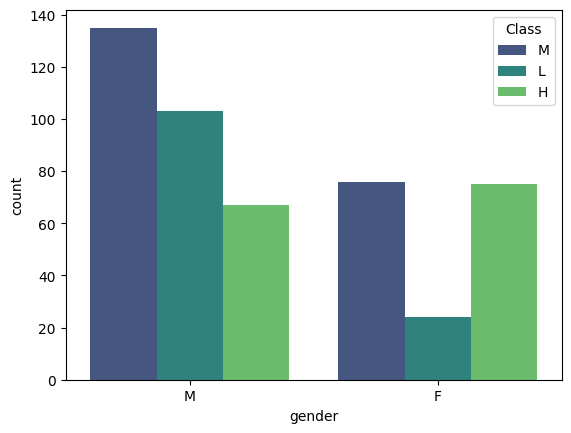

In [24]:
sns.countplot(data=data,x='gender',hue='Class',palette='viridis')

''' though the number of male students is greater than the female but the percentage of high level students are less than on the other hand , low level students in the male are quite a lot greater than the female students. '''

<Axes: xlabel='Relation', ylabel='count'>

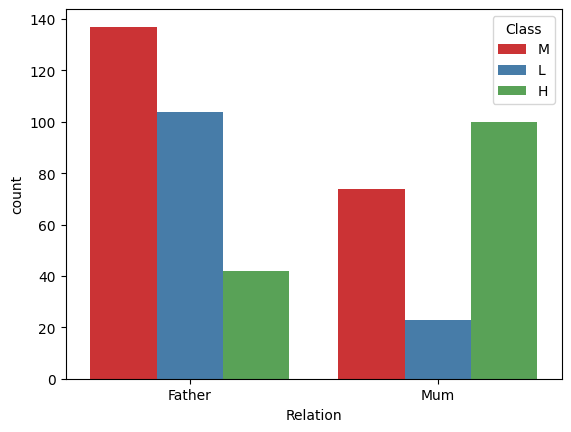

In [25]:
sns.countplot(data=data,x='Relation',hue='Class',palette='Set1')

<Axes: xlabel='StudentAbsenceDays', ylabel='count'>

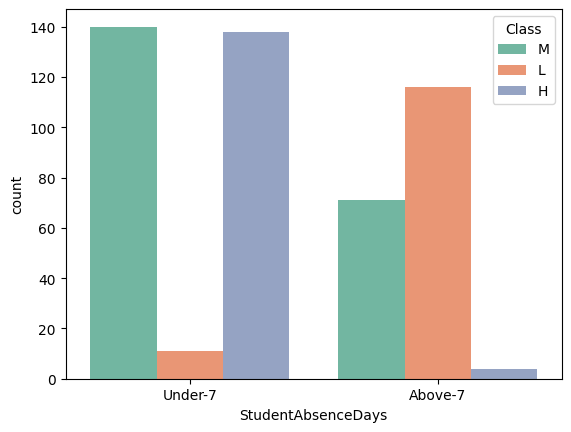

In [26]:
sns.countplot(data=data,x='StudentAbsenceDays',hue='Class',palette='Set2')

''' The above picture clearly states that the student who is absent less than 7 days is mostly the succesful one .It means students absence '''

In [27]:
data.isnull().sum()

,0
gender,0
StageID,0
Relation,0
raisedhands,0
VisITedResources,0
AnnouncementsView,0
Discussion,0
ParentschoolSatisfaction,0
StudentAbsenceDays,0
Class,0


In [28]:
data.Class.value_counts()

,count
Class,
M,211
H,142
L,127


<Axes: xlabel='Class', ylabel='count'>

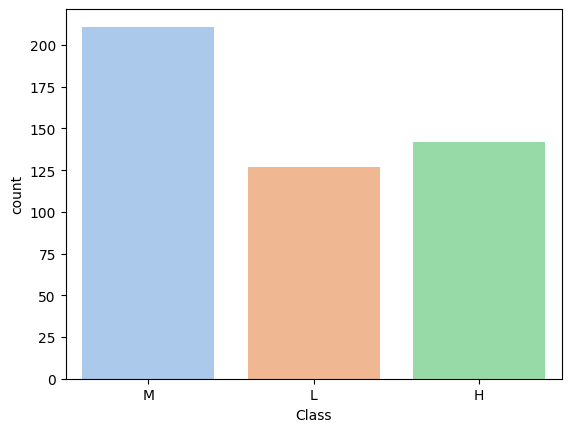

In [29]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(data=data,x='Class',palette='pastel')

In [30]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname


['gender',
 'StageID',
 'Relation',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [31]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname[:-1]:
    data[x]=le.fit_transform(data[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    print('-----------------------')

Feature gender
mapping {'F': np.int64(0), 'M': np.int64(1)}
-----------------------
Feature StageID
mapping {'HighSchool': np.int64(0), 'MiddleSchool': np.int64(1), 'lowerlevel': np.int64(2)}
-----------------------
Feature Relation
mapping {'Father': np.int64(0), 'Mum': np.int64(1)}
-----------------------
Feature ParentschoolSatisfaction
mapping {'Bad': np.int64(0), 'Good': np.int64(1)}
-----------------------
Feature StudentAbsenceDays
mapping {'Above-7': np.int64(0), 'Under-7': np.int64(1)}
-----------------------


In [32]:
data

,gender,StageID,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,0,15,16,2,20,1,1,M
1,1,2,0,20,20,3,25,1,1,M
2,1,2,0,10,7,0,30,0,0,L
3,1,2,0,30,25,5,35,0,0,L
4,1,2,0,40,50,12,50,0,0,M
...,...,...,...,...,...,...,...,...,...,...
475,0,1,0,5,4,5,8,0,0,L
476,0,1,0,50,77,14,28,0,1,M
477,0,1,0,55,74,25,29,0,1,M
478,0,1,0,30,17,14,57,0,0,L


In [33]:
# class follow an ordinal approach for classes so we will try to encode it manually
data['Class']=data['Class'].map({'L':0,'M':1,'H':2})

In [34]:
data

,gender,StageID,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,0,15,16,2,20,1,1,1
1,1,2,0,20,20,3,25,1,1,1
2,1,2,0,10,7,0,30,0,0,0
3,1,2,0,30,25,5,35,0,0,0
4,1,2,0,40,50,12,50,0,0,1
...,...,...,...,...,...,...,...,...,...,...
475,0,1,0,5,4,5,8,0,0,0
476,0,1,0,50,77,14,28,0,1,1
477,0,1,0,55,74,25,29,0,1,1
478,0,1,0,30,17,14,57,0,0,0


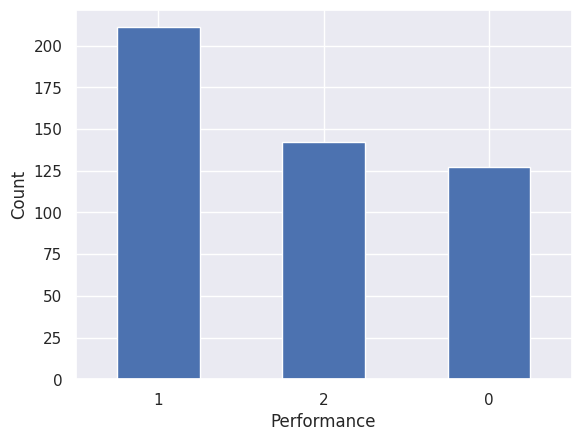

In [35]:
sns.set()
Class_plot=data['Class'].value_counts().plot(kind='bar')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

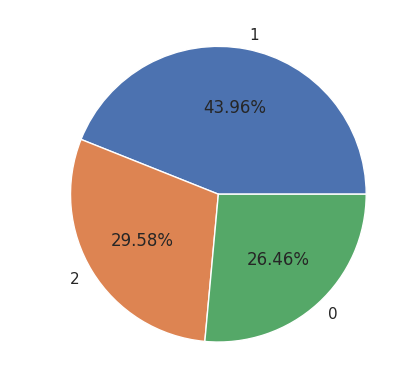

In [36]:
data['Class'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel(' ');

In [37]:
X=data.values[:,0:-1]
Y=data.values[:,-1]

In [38]:
print(X.shape)
print(Y.shape)

(480, 9)
(480,)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [40]:
print(X)

[[ 0.7574764   1.08466911 -0.83433391 ... -0.84332615  0.80239368
   0.81295735]
 [ 0.7574764   1.08466911 -0.83433391 ... -0.66222533  0.80239368
   0.81295735]
 [ 0.7574764   1.08466911 -0.83433391 ... -0.48112451 -1.24627103
  -1.23007683]
 ...
 [-1.32017315 -0.5734238  -0.83433391 ... -0.51734468 -1.24627103
   0.81295735]
 [-1.32017315 -0.5734238  -0.83433391 ...  0.49681992 -1.24627103
  -1.23007683]
 [-1.32017315 -0.5734238  -0.83433391 ...  0.67792074 -1.24627103
  -1.23007683]]


In [41]:
from sklearn.model_selection import train_test_split
# Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [42]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(384, 9)
(384,)
(96, 9)
(96,)


In [43]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier=LogisticRegression()
# fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
Y_pred

array([2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0,
       1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2,
       2, 1, 2, 0, 1, 1, 2, 1])

In [44]:
np.set_printoptions(suppress=True)
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.00591701, 0.49434748, 0.4997355 ],
       [0.07064708, 0.85718398, 0.07216894],
       [0.14959046, 0.83346317, 0.01694638],
       [0.62906019, 0.36218993, 0.00874988],
       [0.00640642, 0.42250288, 0.5710907 ],
       [0.0002327 , 0.18604789, 0.8137194 ],
       [0.00302356, 0.29726439, 0.69971205],
       [0.00130094, 0.39139404, 0.60730502],
       [0.49239611, 0.50170139, 0.00590249],
       [0.95449583, 0.04530733, 0.00019684],
       [0.00138427, 0.62889304, 0.36972269],
       [0.37392422, 0.59124773, 0.03482805],
       [0.00499555, 0.48078095, 0.5142235 ],
       [0.07371507, 0.66428315, 0.26200178],
       [0.01197596, 0.71350876, 0.27451528],
       [0.00390199, 0.48539436, 0.51070365],
       [0.95306231, 0.04661094, 0.00032674],
       [0.00145996, 0.30853298, 0.69000706],
       [0.01196655, 0.87625951, 0.11177394],
       [0.00395981, 0.59754493, 0.39849525],
       [0.85182308, 0.14740519, 0.00077173],
       [0.00263395, 0.84556788, 0.15179817],
       [0.

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[20  3  0]
 [ 1 34 15]
 [ 0  5 18]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.81      0.68      0.74        50
           2       0.55      0.78      0.64        23

    accuracy                           0.75        96
   macro avg       0.77      0.78      0.76        96
weighted avg       0.78      0.75      0.76        96

Accuracy of the model:  0.75


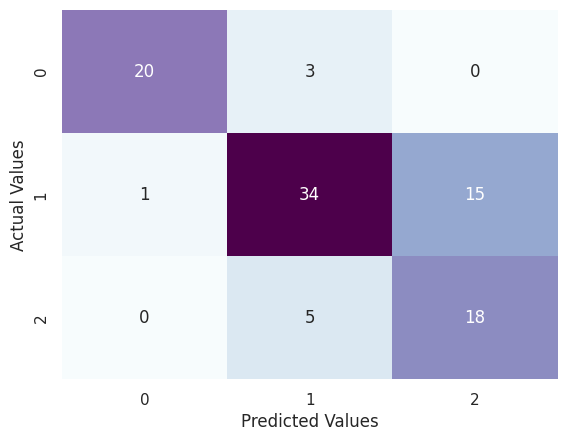

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.81      0.68      0.74        50
           2       0.55      0.78      0.64        23

    accuracy                           0.75        96
   macro avg       0.77      0.78      0.76        96
weighted avg       0.78      0.75      0.76        96

Accuracy of the model:  0.75


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, Y_test)))

Training set score: 0.7578
Test set score: 0.7500


In [48]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

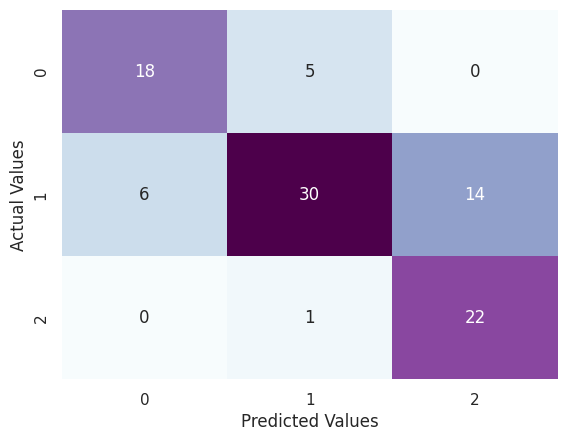

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.83      0.60      0.70        50
           2       0.61      0.96      0.75        23

    accuracy                           0.73        96
   macro avg       0.73      0.78      0.74        96
weighted avg       0.76      0.73      0.73        96

Accuracy of the model:  0.7291666666666666


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [50]:
model_DecisionTree.score(X_train,Y_train)

0.9973958333333334

In [51]:
print('Training set score: {:.4f}'.format(model_DecisionTree.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model_DecisionTree.score(X_test, Y_test)))

Training set score: 0.9974
Test set score: 0.7292


In [52]:
print(list(zip(data.columns[0:-1],model_DecisionTree.feature_importances_)))

[('gender', np.float64(0.04659080790408169)), ('StageID', np.float64(0.04475200367782753)), ('Relation', np.float64(0.03782980354869803)), ('raisedhands', np.float64(0.14128705922993948)), ('VisITedResources', np.float64(0.24978949957398358)), ('AnnouncementsView', np.float64(0.15716733396986007)), ('Discussion', np.float64(0.0922586971116643)), ('ParentschoolSatisfaction', np.float64(0.014873042610268889)), ('StudentAbsenceDays', np.float64(0.21545175237367642))]


In [53]:
sample=pd.DataFrame()
sample['Column']=data.columns[0:-1]
sample['Imp value']=model_DecisionTree.feature_importances_
sample.sort_values('Imp value',ascending=False)


,Column,Imp value
4,VisITedResources,0.249789
8,StudentAbsenceDays,0.215452
5,AnnouncementsView,0.157167
3,raisedhands,0.141287
6,Discussion,0.092259
0,gender,0.046591
1,StageID,0.044752
2,Relation,0.037830
7,ParentschoolSatisfaction,0.014873


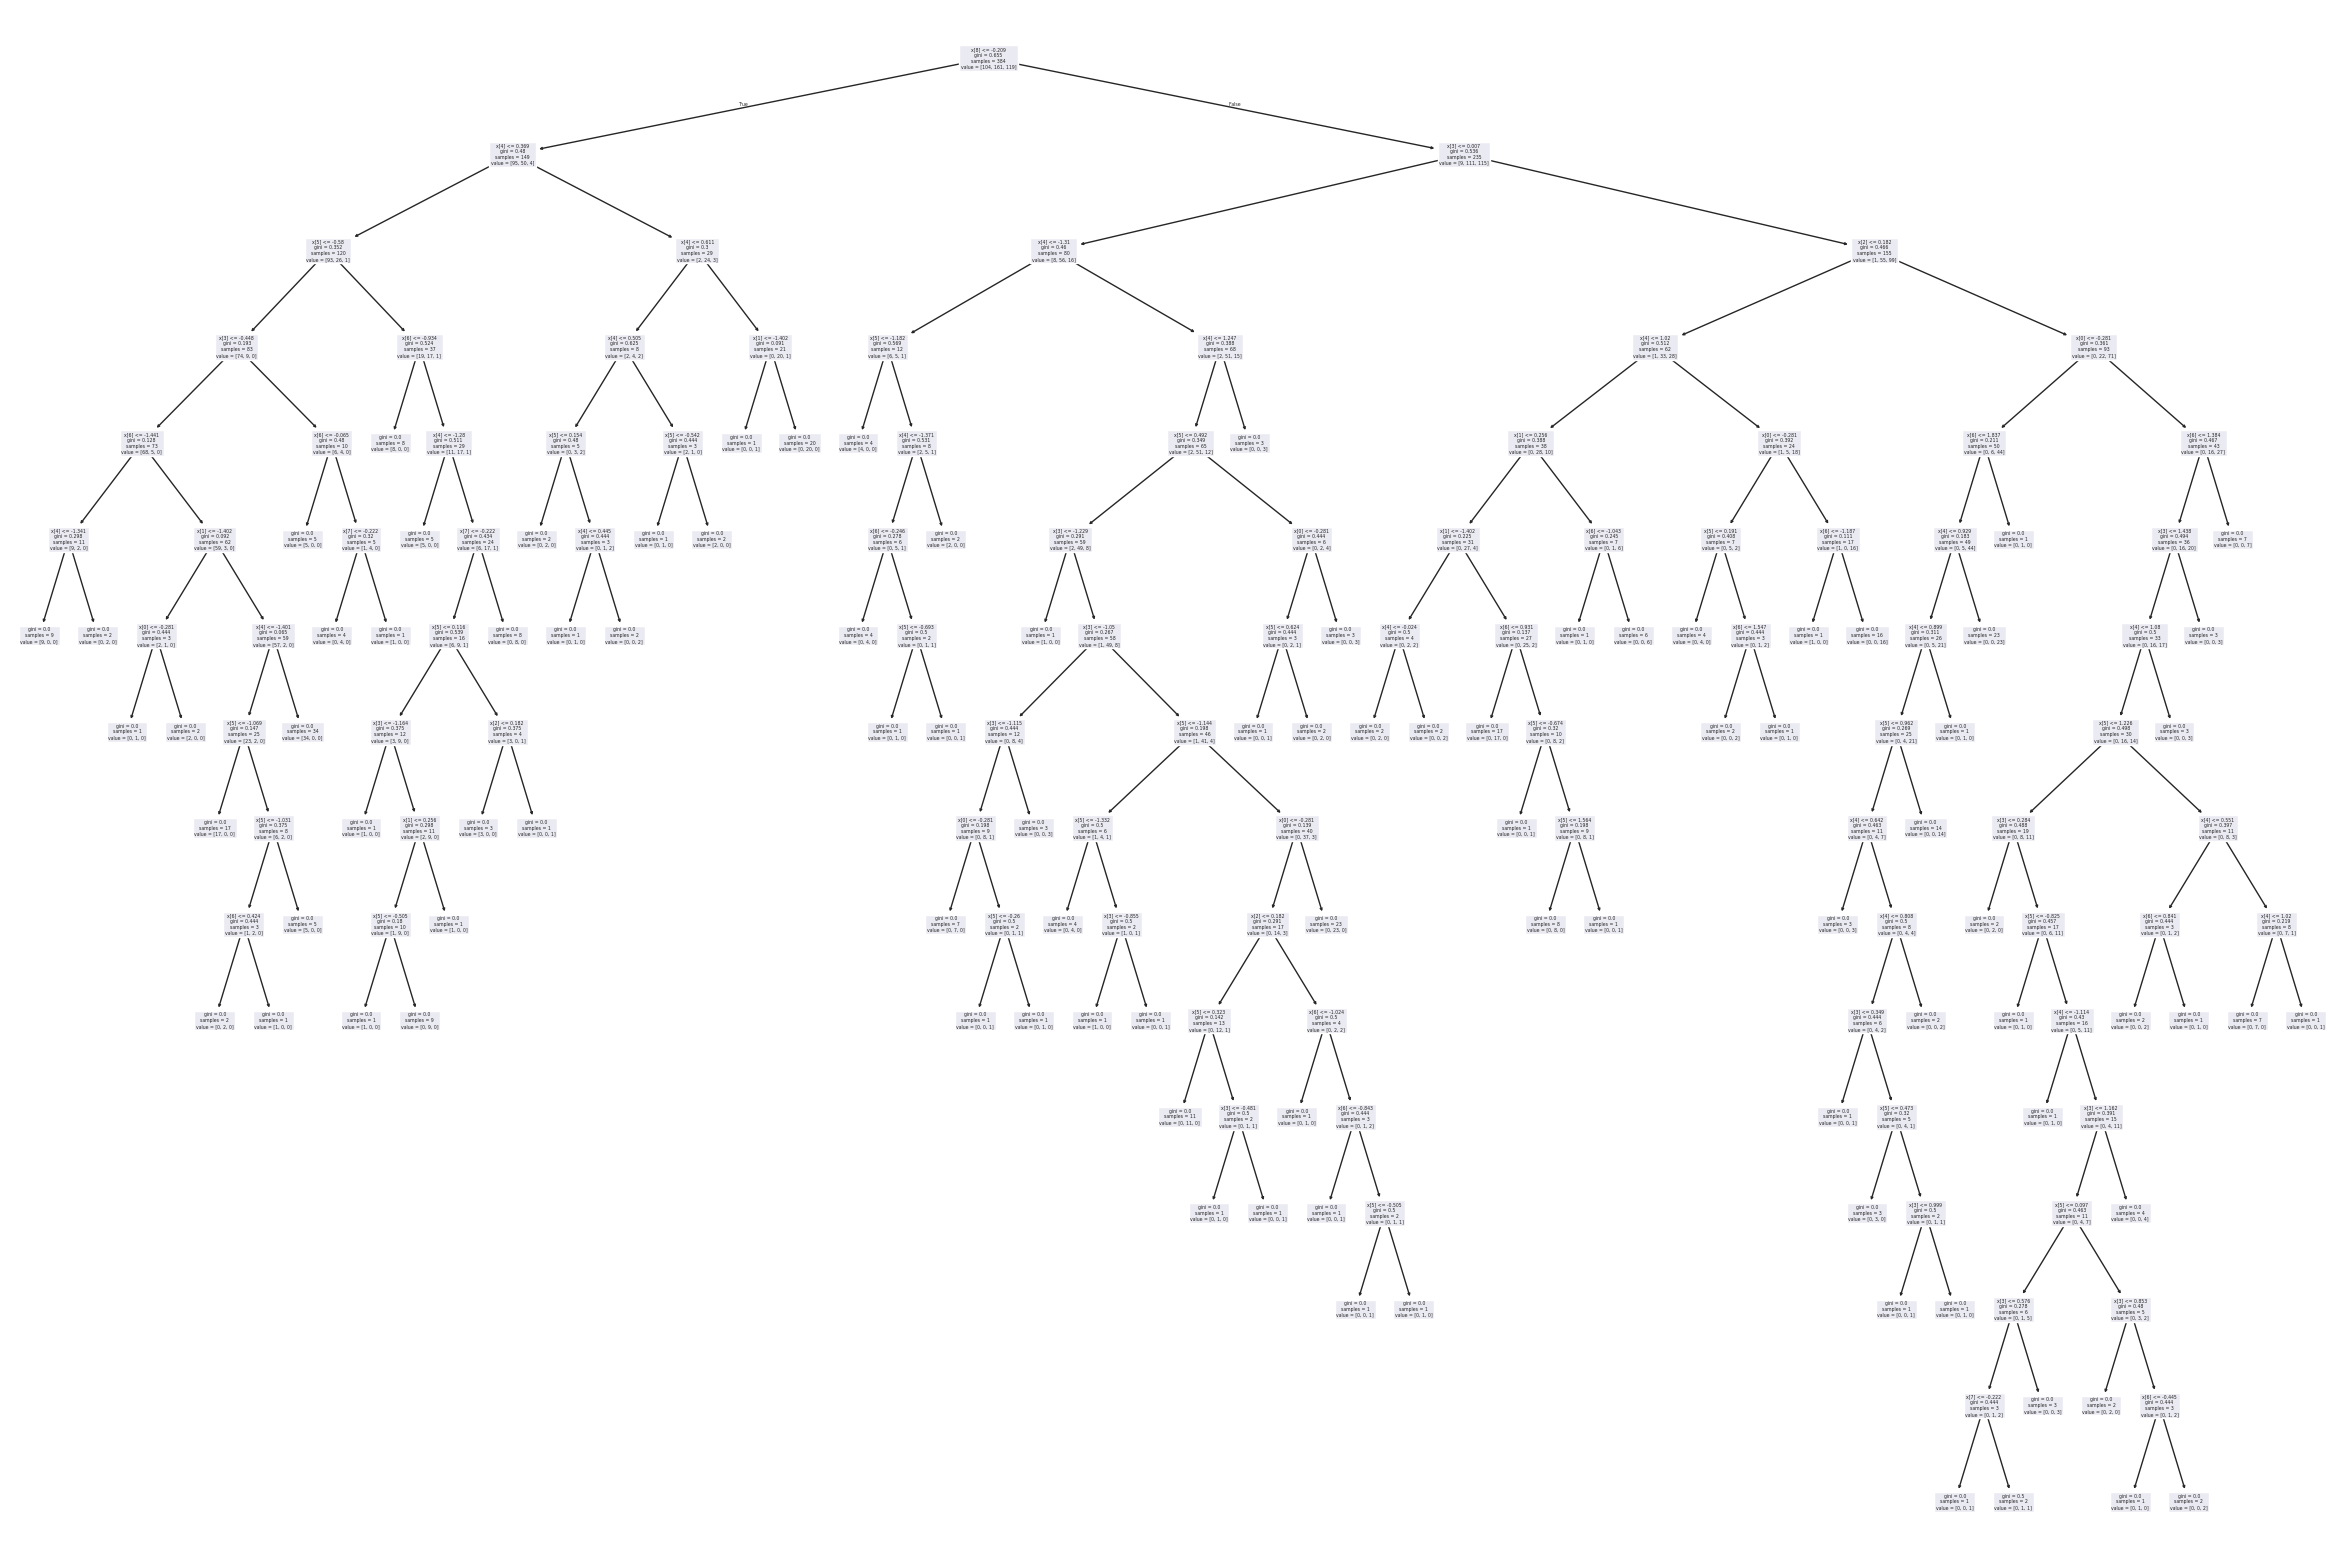

In [54]:
plt.figure(figsize=(30,20))
from sklearn import tree
tree.plot_tree(model_DecisionTree.fit(X_train,Y_train));

In [55]:
from sklearn import tree
with open(r"model_DecisionTree","w") as f:
    f=tree.export_graphviz(model_DecisionTree,feature_names=data.columns[0:-1],out_file=f)
    # generate the file and upload the code webgraphviz.com to plot the decision tree

In [56]:
data_new=data.drop(['StageID','ParentschoolSatisfaction','Relation'],axis=1)
data_new

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,1,15,16,2,20,1,1
1,1,20,20,3,25,1,1
2,1,10,7,0,30,0,0
3,1,30,25,5,35,0,0
4,1,40,50,12,50,0,1
...,...,...,...,...,...,...,...
475,0,5,4,5,8,0,0
476,0,50,77,14,28,1,1
477,0,55,74,25,29,1,1
478,0,30,17,14,57,0,0


In [57]:
# Spliting the data
X_n=data_new.values[:,:-1]
Y_n=data_new.values[:,-1]

In [58]:
print(X_n.shape)
print(Y_n.shape)

(480, 6)
(480,)


In [59]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_n)
X_n = scaler.transform(X_n)
#X=scaler.fit_transform(X)
#print(X)

In [60]:
from sklearn.model_selection import train_test_split
# Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X_n,Y_n,test_size=0.2,random_state=42)

In [61]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

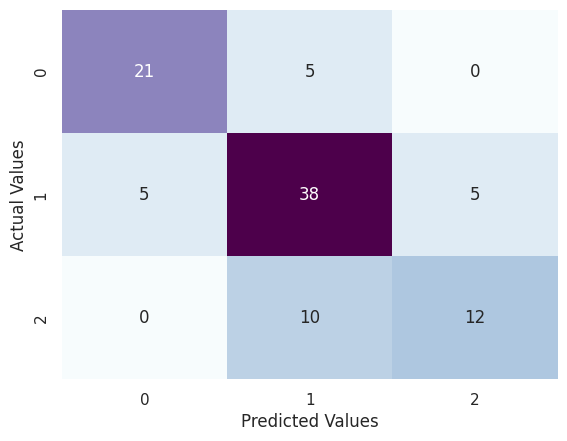

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.72      0.79      0.75        48
           2       0.71      0.55      0.62        22

    accuracy                           0.74        96
   macro avg       0.74      0.71      0.73        96
weighted avg       0.74      0.74      0.74        96

Accuracy of the model:  0.7395833333333334


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Overftting in Decision Tree algorithm

In [63]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=20,splitter='best',min_samples_leaf=6,max_depth=15)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

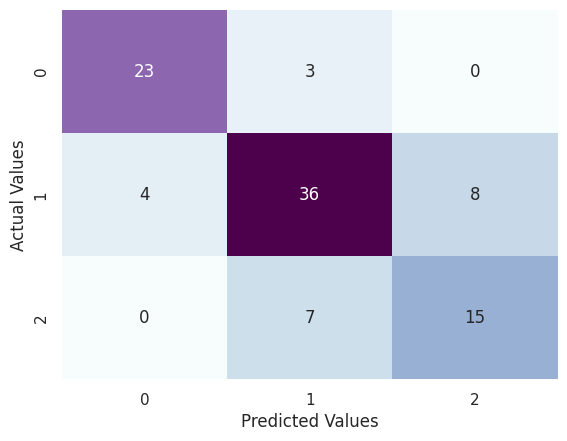

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.78      0.75      0.77        48
           2       0.65      0.68      0.67        22

    accuracy                           0.77        96
   macro avg       0.76      0.77      0.77        96
weighted avg       0.77      0.77      0.77        96

Accuracy of the model:  0.7708333333333334


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [65]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_DecisionTree.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model_DecisionTree.score(X_test, Y_test)))

Training set score: 0.8307
Test set score: 0.7708


In [68]:
#predicting using the random _forest_classifier
from sklearn.ensemble import RandomForestClassifier
model_RandomForest= RandomForestClassifier(n_estimators=100, random_state=10, bootstrap= True)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred = model_RandomForest.predict(X_test)
#

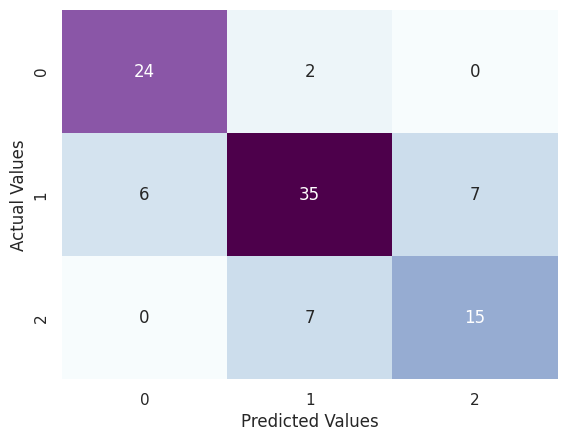

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        26
           1       0.80      0.73      0.76        48
           2       0.68      0.68      0.68        22

    accuracy                           0.77        96
   macro avg       0.76      0.78      0.77        96
weighted avg       0.77      0.77      0.77        96

Accuracy of the model:  0.7708333333333334


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [72]:
model_RandomForest=RandomForestClassifier( random_state=10, bootstrap=True) #fixed parameters should be passsed here

#parameters for trial and error should be passed here
parameter_space = {
    'n_estimators':[100,300,500,1000],
    'max_depth':[10,15,8, 12],
    'min_samples_leaf':[1,3,4,5,6,7]
    }
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearchCV
clf = RandomizedSearchCV(model_RandomForest, parameter_space, n_jobs=-1, cv=5)

In [73]:
clf.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 8, 12],
                                        'min_samples_leaf': [1, 3, 4, 5, 6, 7],
                                        'n_estimators': [100, 300, 500, 1000]})

In [74]:
print("Best Parameters found are: ")
print(clf.best_params_)

Best Parameters found are: 
{'n_estimators': 1000, 'min_samples_leaf': 3, 'max_depth': 8}


In [75]:
clf.best_score_

np.float64(0.7342447026657554)

In [76]:
Y_pred=clf.predict(X_test)
#

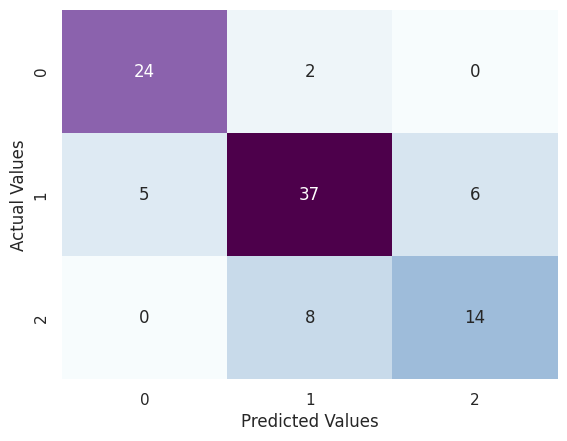

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()